# Gaussian Transformation
some machine lerarning models like linear and logistic assune that the featrues normally distributed. they give better accuricy and performance.
1. Logarithmic transformation
2. Reciprocal transformation
3. Square root transformation
4. Exponential transformation
5. Box Cox transformation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the data
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# One-line explanation (very important)

### Matplotlib reuses the same figure unless plt.figure() or plt.show() is used properly.

In [3]:
# checking the null values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
# filling the age wiht the missing values
df['Age']=df['Age'].fillna(df['Age'].median())

In [5]:
# rechecking the null values
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

Survived
Age
Fare


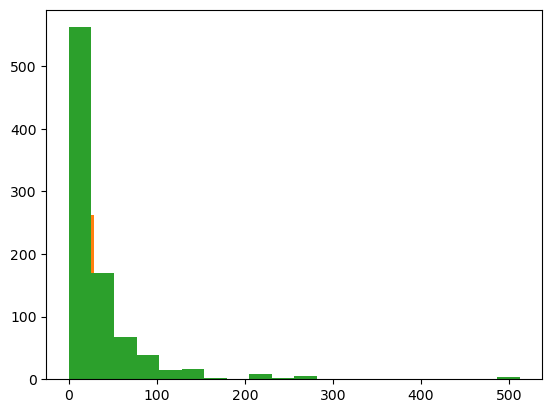

In [6]:
# checking the distributions of the columns using the graph
normal_check=[feature for feature in df.columns]
for val in normal_check:
    print(val)
    plt.hist(df[val],bins=20)

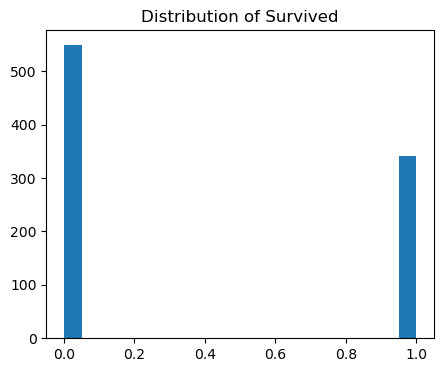

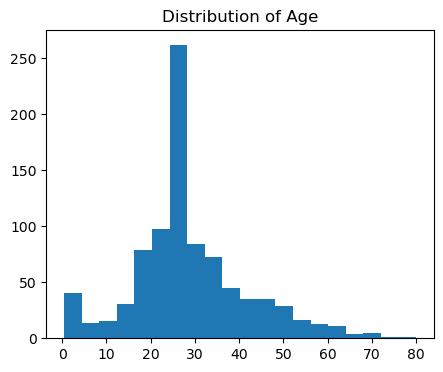

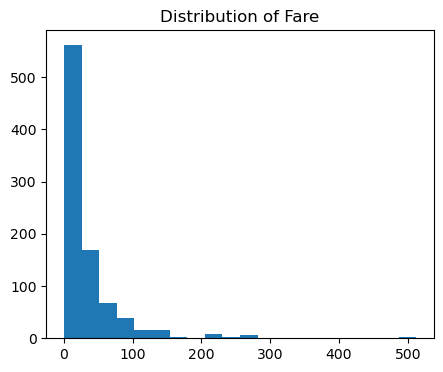

In [7]:
for col in df.columns:
    plt.figure(figsize=(5,4))   # 🔑 THIS LINE
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

# Q-Q plot
#### if we want to check the whether feature is gaussian or normal distributed we use Q-Q plot

In [8]:
import scipy.stats as stat
import pylab

In [9]:
# making a function to plot side by side graph of the normal graph and Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

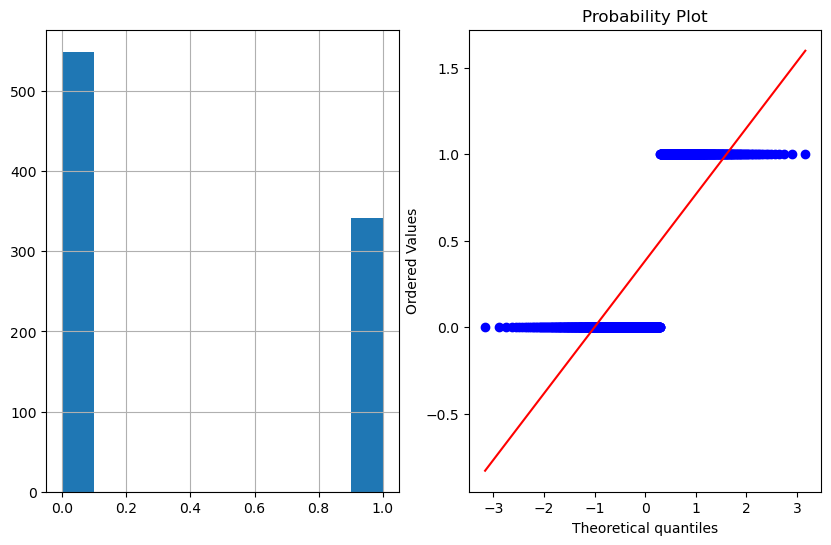

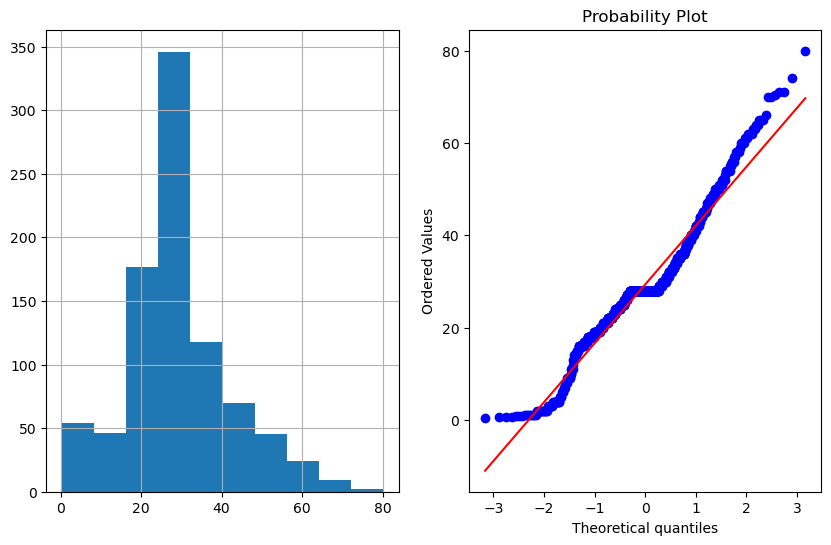

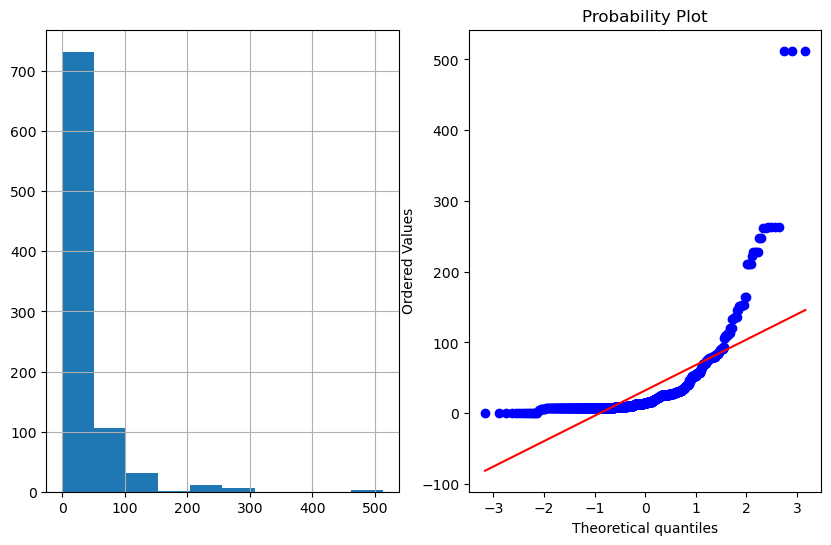

In [10]:
# plotting graph for the columns in the data
for f in df.columns:
    plot_data(df,f)

## observations
1. we cant do any thing with survivedd because they have to bars either 0 or 1
2. Age is normally distributed because the all the points of age coluns age near to the Q-Q plot
3. Fare is not normally distributed we need to transform fare using different transformation techniques.

# 1.Logarithmic transformation
- work well in case of right or left skweed data

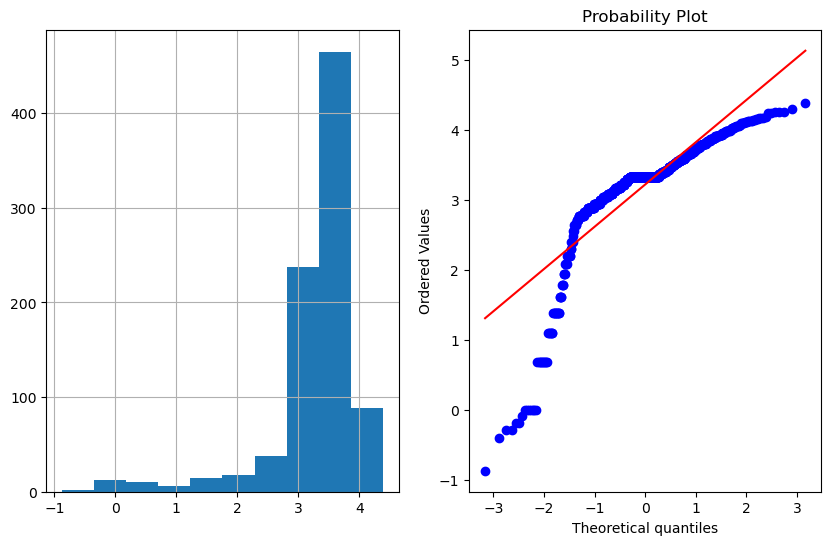

In [11]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

- we are not getting diseared normal distribution

In [12]:
(df['Fare'] == 0).sum()

np.int64(15)

your column may contain 0.
it become log[0]=-inf
----------solution---------------
use np.log1p(df[column_name])


C:\Users\krish\anaconda\envs\dam\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


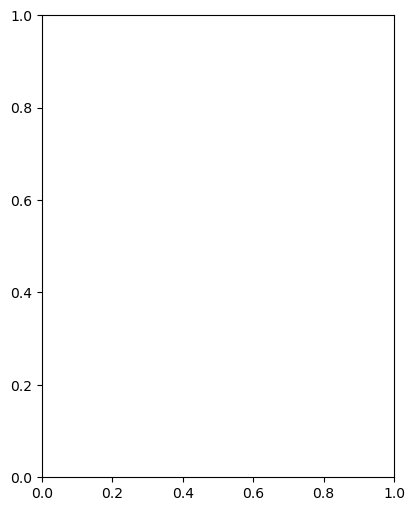

In [13]:
# lets check for fare because it is some skew distributes
try:
    df['Fare_log']=np.log(df['Fare'])
    plot_data(df,'Fare_log')
except ValueError:
    print("your column may contain 0.")
    print("it become log[0]=-inf")
    print("----------solution---------------")
    print("use np.log1p(df[column_name])")

# When should you use log1p?

- Use it when:

1. Data is right-skewed

2. Feature contains zeros

3. You plan to use ML models

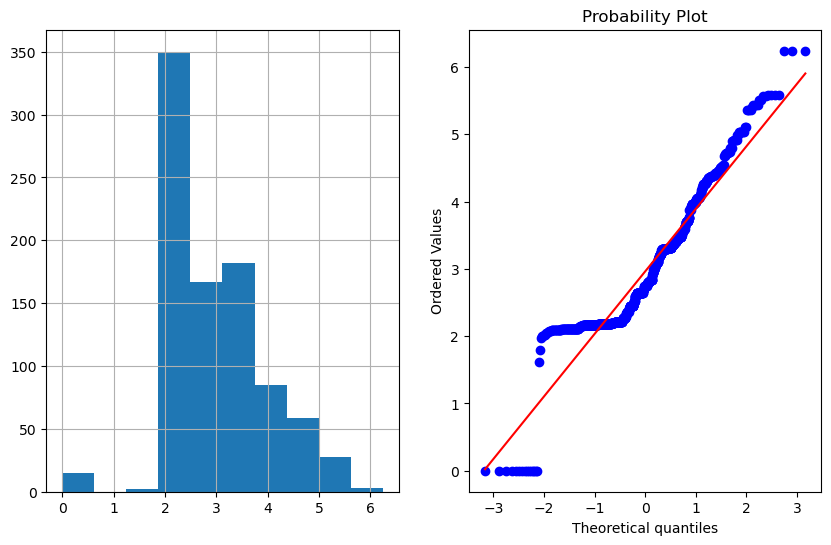

In [14]:
df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df, 'Fare_log')

# results
- log transformation is better both age and fare

# 2.Reciprocal transformation

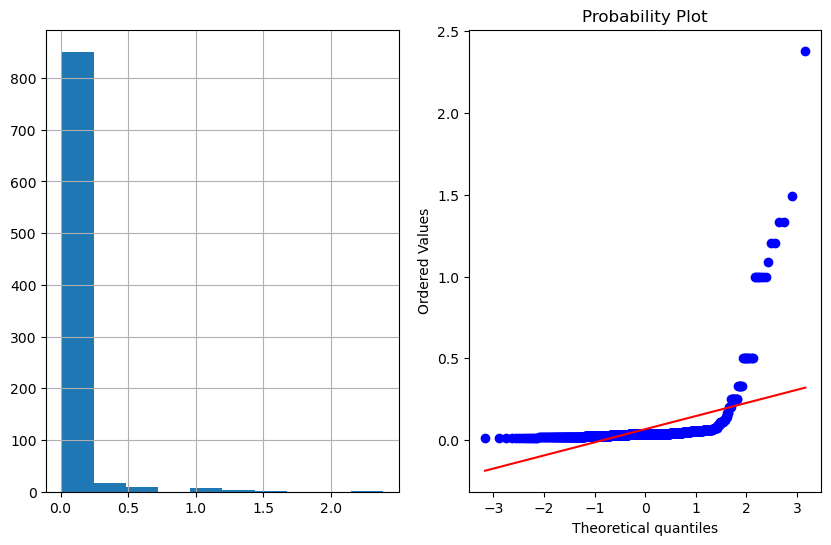

In [15]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

- we are not getting diseared results

# 3.Squareroot transformation

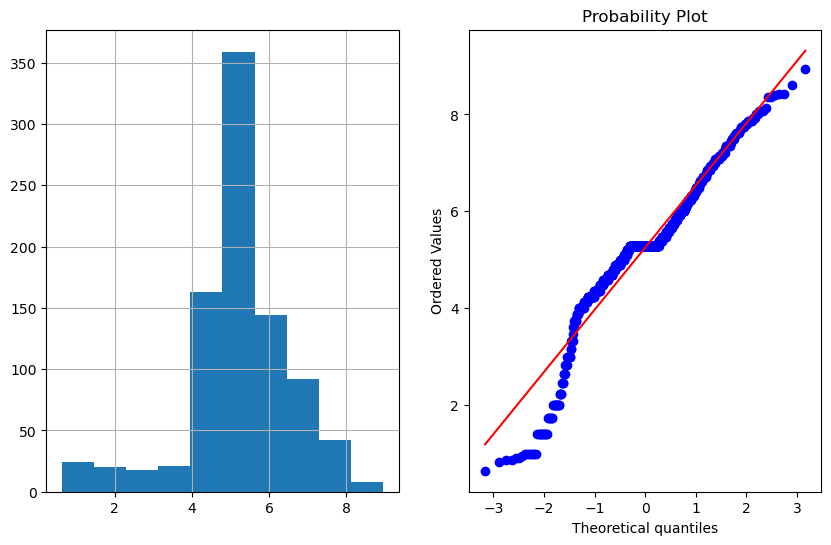

In [16]:
df['Age_square']=df.Age**(1/2)
plot_data(df,'Age_square')

# 4.Exponential transformation

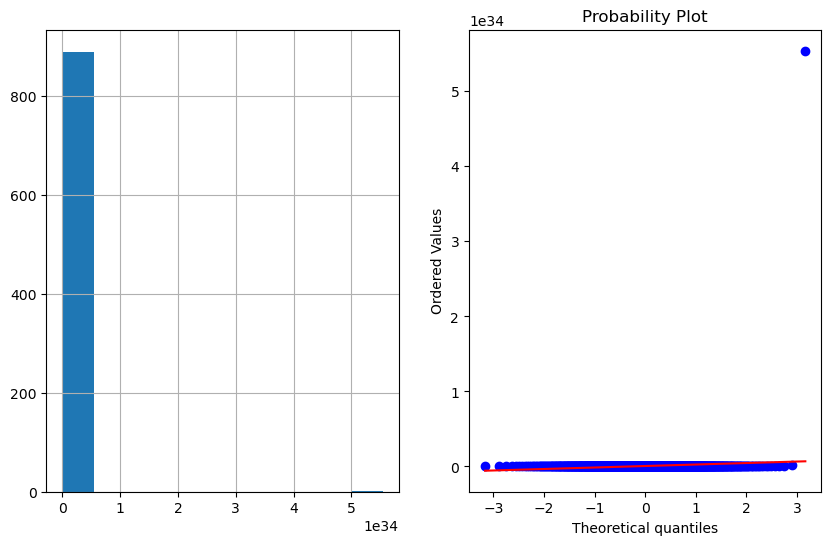

In [19]:
df['Age_exp'] = np.exp(df['Age'])
plot_data(df, 'Age_exp')

# Box-cox transformation
- T(Y)=(Y ecp(λ) - 1) / 1
- Y is response variable
- λ is the transformation parameter
- λ variea form -5 to 5

In [21]:
df['Age_boxcox'],parameters=stat.boxcox(df['Age'])
print(parameters)

0.796453194094064


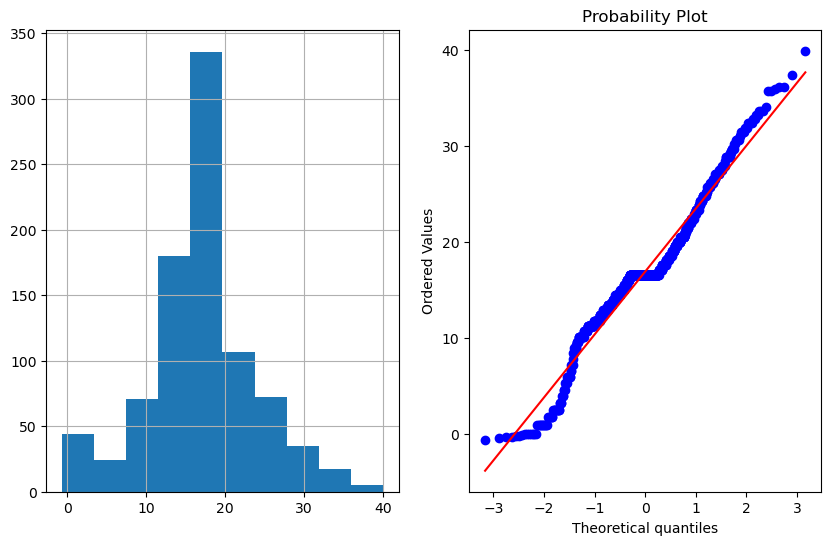

In [23]:
plot_data(df,'Age_boxcox')

In [24]:
# using boxcox for fare
df['Fare_boxcox'],parameters=stat.boxcox(df['Fare'])
print(parameters)

ValueError: Data must be positive.

# solution 
- use +1 wiht df['fare']

In [25]:
df['Fare_boxcox'],parameters=stat.boxcox(df['Fare']+1)
print(parameters)

-0.09778702173339403


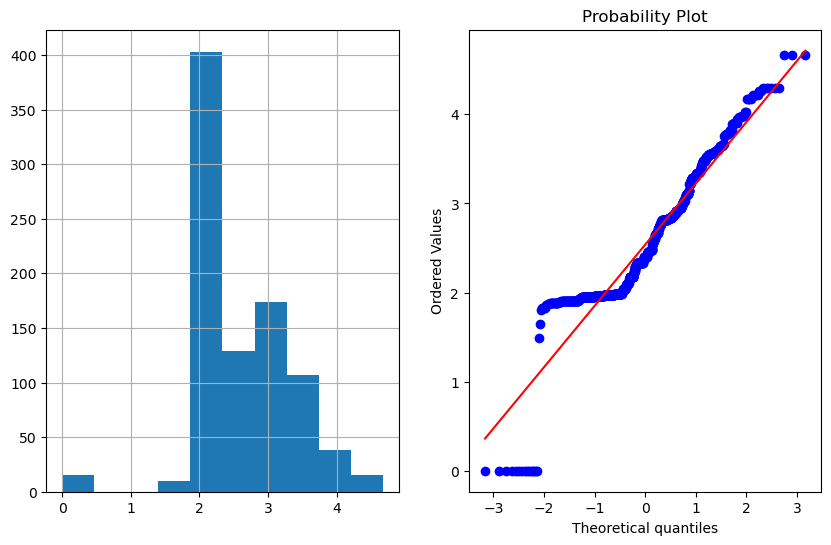

In [27]:
plot_data(df,'Fare_boxcox')